<a href="https://colab.research.google.com/github/asu-trans-ai-lab/OSM2GMNS/blob/master/osm2gmns_quickstart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# __OSM2GMNS Quickstart Notebook__

OSM2GMNS is a Python package that helps generate high-fidelity mesoscopic transportation network models from OpenStreetMap data. This enables even the smallest transportation authorities to begin analysis with a high quality network model for future analysis. 


# 1. Data Collection
We rely on a few open-source projects to gather the raw data to start our analysis. Export data from your area of interest from the following sources.
 * __OpenStreetMap base map__: https://www.openstreetmap.org/export
   * __Geofabrik__: Alternative for non-rectangular Areas of Interest: http://download.geofabrik.de/
 * __Bike Transport Info__ (Optional):  https://extract.bbbike.org

For this demonstration, we'll use sample data from the ASU Transit AI Lab Github

In [ ]:
# Clear out any old data
# /osm_test_data_set/
!rm -rf ./osm_test_data_set/

# Get the ASU Transit AI lab sample dataset
!git clone https://github.com/asu-trans-ai-lab/osm_test_data_set

Cloning into 'osm_test_data_set'...
remote: Enumerating objects: 307, done.
remote: Counting objects: 100% (26/26), done.
remote: Compressing objects: 100% (25/25), done.
remote: Total 307 (delta 11), reused 0 (delta 0), pack-reused 281
Receiving objects: 100% (307/307), 151.15 MiB | 21.16 MiB/s, done.
Resolving deltas: 100% (100/100), done.
Checking out files: 100% (80/80), done.


# 2. Install the osm2gmns package

In [ ]:
!pip install osm2gmns

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 69 kB 6.0 MB/s 
     |████████████████████████████████| 1.3 MB 32.6 MB/s 


# 3. Create a network model from OpenStreetMap exports

osm2gmns, 0.6.8
arguments used for network parsing:
  filename: ./osm_test_data_set/yuma.pbf
  network_types: ('auto',)
  link_types: all
  POI: True
  POI_sampling_ratio: 1.0
  strict_mode: True
  offset: no
  min_nodes: 1
  combine: False
  bbox: None
  default_lanes: False
  default_speed: False
  default_capacity: False
  start_node_id: 0
  start_link_id: 0

Building Network from OSM file
  reading osm file
  parsing osm network
    generating nodes and links
    generating POIs
  number of nodes: 5443, number of links: 13354, number of pois: 6485


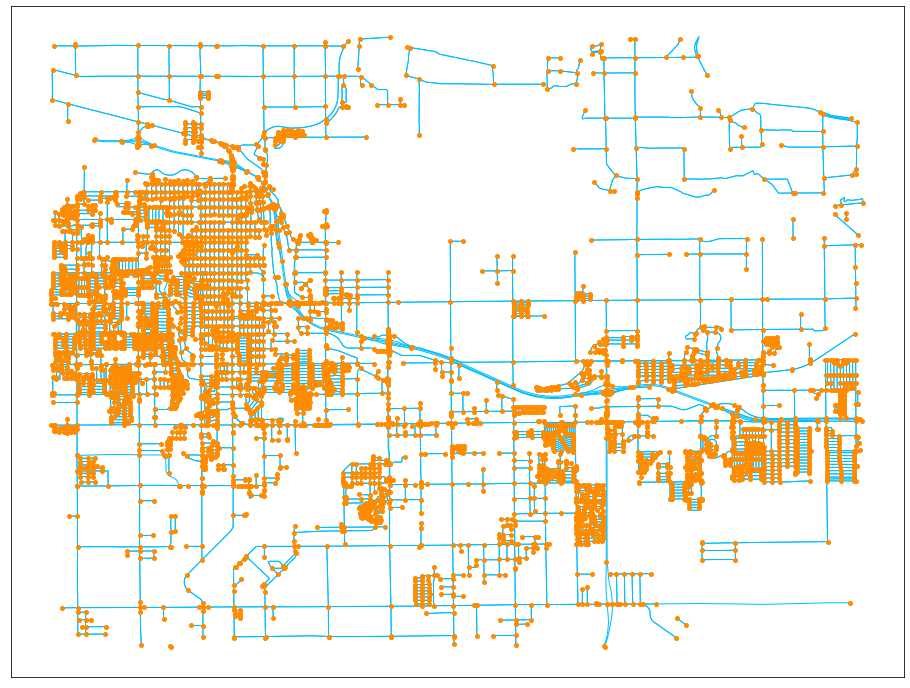

In [ ]:
# Import osm2gmns with the alias as "og" (easier to type)
import osm2gmns as og

# Generate a net from the Yuma, AZ OpenStreetMap export and include Points of Interest (POI=True)
input_file = './osm_test_data_set/yuma.pbf'
net = og.getNetFromFile(input_file, POI=True) 

# Use og.show(net) to visualize the network model
og.show(net)

#4. Modify the network model 

## Example: Points of Interest

We can connect Points of Interest (POIs) to the network model. Nodes representing the center (centroids) of POIs are generated. These nodes are connected with a link to the nearest node on the rest of the network

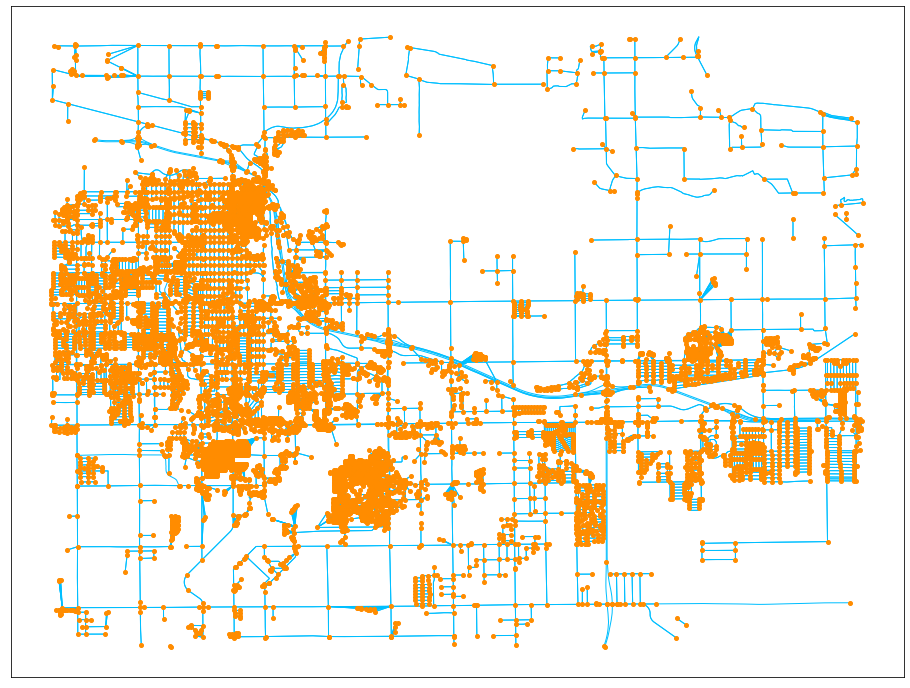

In [ ]:

og.connectPOIWithNet(net)
og.show(net)

## Example: Consolidate Complex Intersections 
Intersections can have lots of nodes representing different turn lanes, crosswalks, etc. 

Using og.consolidateComplexIntersections(net), we can combine nodes in intersections into a single node to make analysis faster and simpler

Consolidating Complex Intersections


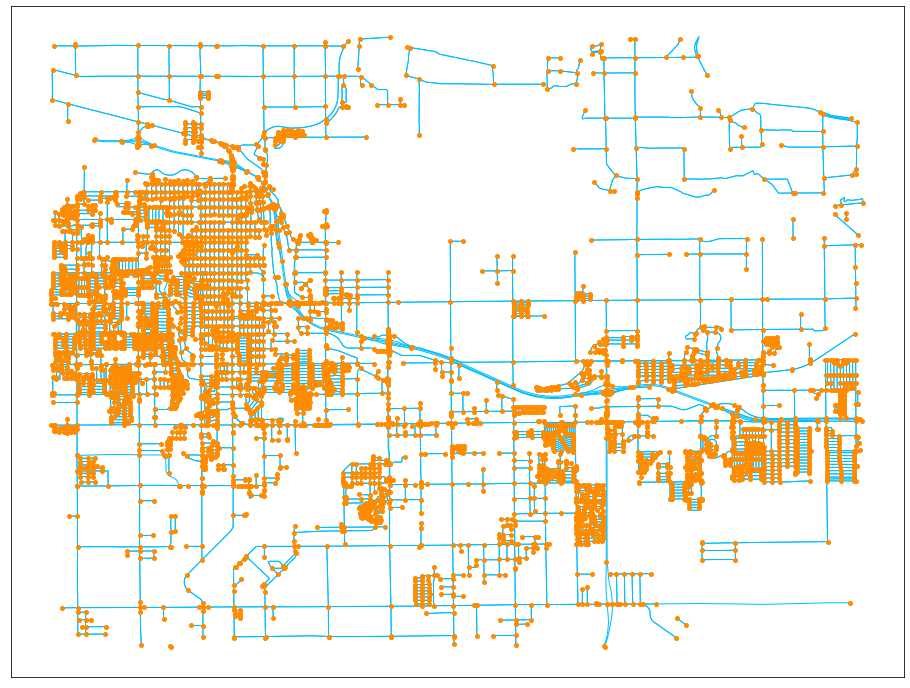

In [ ]:
og.consolidateComplexIntersections(net)
og.show(net)

#5. Export transportation network model

We can export our transportation network model to a CSV format for ease of use in further analysis with other systems. 

og.outputNetToCSV(...) will generate two files: node.csv representing nodes, and link.csv representing links (edges) between nodes.

In [ ]:
# Create a folder called yuma_model. 
og.outputNetToCSV(net, output_folder="yuma_model")

Outputting Network Files


In [ ]:
"""
Take a peek at the format of the CSVs using the Pandas library
Loading the CSV files gives us a DataFrame object which is very heavily used in 
data science and analysis. 

For more information on how this data is organized, check out the GMNS specification

https://github.com/zephyr-data-specs/GMNS/pull/54

"""

import pandas as pd

node_dataframe = pd.read_csv("./yuma_model/node.csv")
node_dataframe.head()

,name,node_id,osm_node_id,osm_highway,zone_id,ctrl_type,node_type,activity_type,is_boundary,x_coord,y_coord,intersection_id,poi_id,notes
0,NaN,0,87658099,NaN,NaN,NaN,NaN,NaN,NaN,-114.650533,32.738111,NaN,NaN,NaN
1,NaN,1,6669453747,NaN,NaN,NaN,NaN,NaN,NaN,-114.650770,32.738130,NaN,NaN,NaN
2,NaN,2,414216967,NaN,NaN,NaN,NaN,NaN,NaN,-114.655145,32.737392,NaN,NaN,NaN
3,NaN,3,87658128,NaN,NaN,NaN,NaN,NaN,NaN,-114.650761,32.736414,NaN,NaN,NaN
4,NaN,4,6669453744,NaN,NaN,NaN,NaN,NaN,NaN,-114.650417,32.736395,NaN,NaN,NaN


In [ ]:
link_dataframe = pd.read_csv("./yuma_model/link.csv")
link_dataframe.head()

,name,link_id,osm_way_id,from_node_id,to_node_id,dir_flag,length,lanes,free_speed,capacity,link_type_name,link_type,geometry,allowed_uses,from_biway,is_link,VDF_fftt1,VDF_cap1
0,NaN,0,10351539,0,1,1,22.30,1.0,NaN,NaN,motorway,1,"LINESTRING (-114.6505335 32.7381113, -114.6507...",auto,0,1,NaN,NaN
1,NaN,1,10351539,1,2,1,421.57,1.0,NaN,NaN,motorway,1,"LINESTRING (-114.6507704 32.7381303, -114.6521...",auto,0,1,NaN,NaN
2,NaN,2,10351544,3,4,1,32.33,1.0,NaN,NaN,motorway,1,"LINESTRING (-114.6507609 32.7364139, -114.6506...",auto,0,1,NaN,NaN
3,NaN,3,10351544,4,5,1,334.84,1.0,NaN,NaN,motorway,1,"LINESTRING (-114.6504171 32.7363947, -114.6502...",auto,0,1,NaN,NaN
4,NaN,4,10351607,6,7,1,277.79,NaN,NaN,NaN,motorway,1,"LINESTRING (-114.6274733 32.7323742, -114.6250...",auto,0,1,NaN,NaN


#6. Basic analysis with Pandas

The node and link files are in CSV format, which can be used with a wide variety of programming languages, such as R, and programs, such as Excel.

Here, we show a quick demonstration of some simple analysis using Python

In [ ]:
# From the previous cells, we have pandas DataFrame objects representing the node and link data for our model
print(node_dataframe.head(), link_dataframe.head())

  name  node_id  osm_node_id osm_highway  zone_id ctrl_type  node_type  \
0  NaN        0     87658099         NaN      NaN       NaN        NaN   
1  NaN        1   6669453747         NaN      NaN       NaN        NaN   
2  NaN        2    414216967         NaN      NaN       NaN        NaN   
3  NaN        3     87658128         NaN      NaN       NaN        NaN   
4  NaN        4   6669453744         NaN      NaN       NaN        NaN   

   activity_type  is_boundary     x_coord    y_coord  intersection_id  poi_id  \
0            NaN          NaN -114.650533  32.738111              NaN     NaN   
1            NaN          NaN -114.650770  32.738130              NaN     NaN   
2            NaN          NaN -114.655145  32.737392              NaN     NaN   
3            NaN          NaN -114.650761  32.736414              NaN     NaN   
4            NaN          NaN -114.650417  32.736395              NaN     NaN   

   notes  
0    NaN  
1    NaN  
2    NaN  
3    NaN  
4    NaN     

In [ ]:
# Similar to Pivot Tables in Excel, Pandas allows us to 

node_dataframe.pivot(index="x_coord", columns="")